Found 1633 files belonging to 8 classes.
Using 1307 files for training.
['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']
Number of training batches: 41


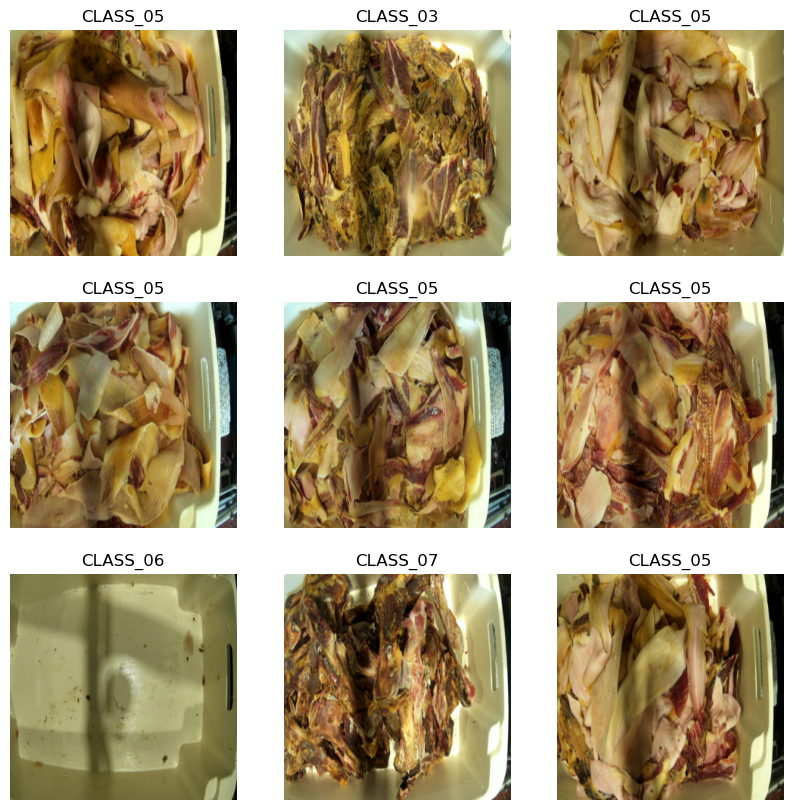

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow.keras as keras
import os
import random
from keras.models import Sequential
import pickle

from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

train_ds = tf.keras.utils.image_dataset_from_directory( 
    'D:\\Descargas nuevas\\CarneDataset\\train',
validation_split=0.2,
subset="training",
seed=123,
image_size=(300,300))

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
num_classes = len(class_names)

print('Number of training batches: %d' % tf.data.experimental.cardinality(train_ds).numpy())

In [4]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_ds.prefetch(buffer_size=AUTOTUNE)
#validation_dataset = validation_ds.prefetch(buffer_size=AUTOTUNE)

model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=( 300, 300, 3 )),
    tf.keras.layers.Conv2D(16,3, padding='same', activation= 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3, padding='same', activation= 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3, padding='same', activation= 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes),
])
        
model.summary()

#model.compile(optimizer=optimizer, loss=lossfn, metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#history = model.fit(train_ds, epochs=15 ,validation_data=(validation_ds))
history = model.fit(train_ds, epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)       

Accuracy on test dataset: 0    0.568477
1    0.743688
2    0.847743
3    0.933435
4    0.941086
5    0.980107
6    0.994644
7    0.999235
8    0.998470
9    1.000000
Name: accuracy, dtype: float64


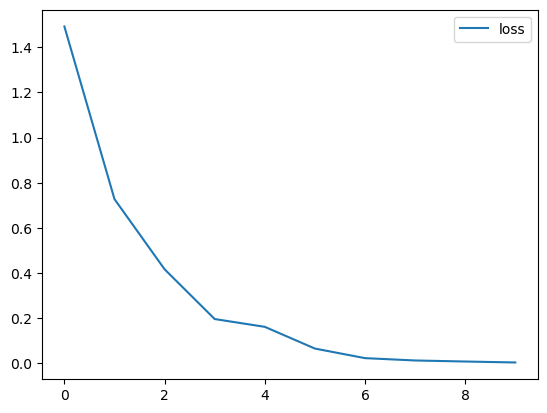

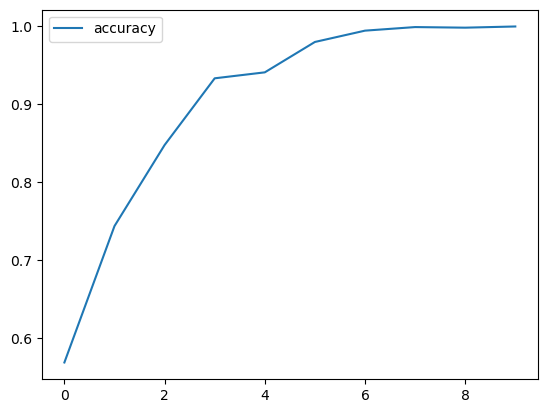

In [5]:
import pandas as pd
metrics_df = pd.DataFrame(history.history)

metrics_df[["loss"]].plot();

metrics_df[["accuracy"]].plot();

print('Accuracy on test dataset:', metrics_df["accuracy"])

In [6]:
model.save('model.h5')
load_saved_model = tf.keras.models.load_model("model.h5")
load_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)       

In [7]:
test_ds = tf.keras.utils.image_dataset_from_directory( 
    'D:\\Descargas nuevas\\CarneDataset\\test',
validation_split=0.2,
subset="validation",
seed=123,
image_size=(300,300))

Found 810 files belonging to 8 classes.
Using 162 files for validation.


In [8]:
model.evaluate(test_ds,return_dict=True)

6/6 [==============================] - 7s 226ms/step - loss: 0.4063 - accuracy: 0.8889


{'loss': 0.40626540780067444, 'accuracy': 0.8888888955116272}

In [10]:
image_path= 'D:\\Descargas nuevas\\CarneDataset\\testimagen\\imagendeprueba.png'
image = tf.keras.preprocessing.image.load_img(image_path).resize((300,300))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)

1/1 [==============================] - 1s 908ms/step


In [12]:
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen puede ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen puede ser CLASS_05 con un 99.96 % de exactitud.


Found 810 images belonging to 8 classes.


C:\Users\xavi_\AppData\Local\Temp\ipykernel_2196\1249858839.py:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator)
C:\Users\xavi_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavi_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavi_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:134

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.8750    0.1458    0.2500        48
           2     0.6129    0.7835    0.6878        97
           3     0.5195    0.8889    0.6557        45
           4     0.9601    0.8911    0.9243       459
           5     1.0000    0.7895    0.8824        19
           6     0.6918    0.8860    0.7769       114
           7     0.7857    0.4074    0.5366        27

    accuracy                         0.8136       810
   macro avg     0.6806    0.5990    0.5892       810
weighted avg     0.8452    0.8136    0.8053       810



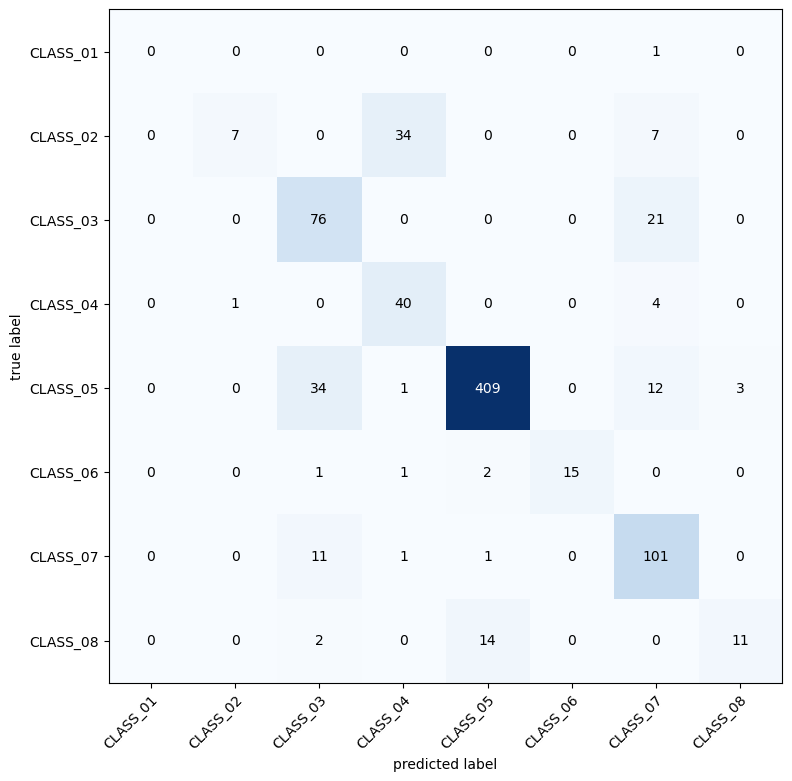

In [13]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, classification_report
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

width_shape = 300
height_shape = 300

names = ['CLASS_01','CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']

test_data_dir = 'D:\\Descargas nuevas\\CarneDataset\\test'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape),
    class_mode='categorical',
    shuffle=False)

custom_Model= load_model("model.h5")

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(8,8), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real, y_pred, digits = 4))